In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df=df.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},axis=1)

In [6]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
subjects=['Age','Income','Score']

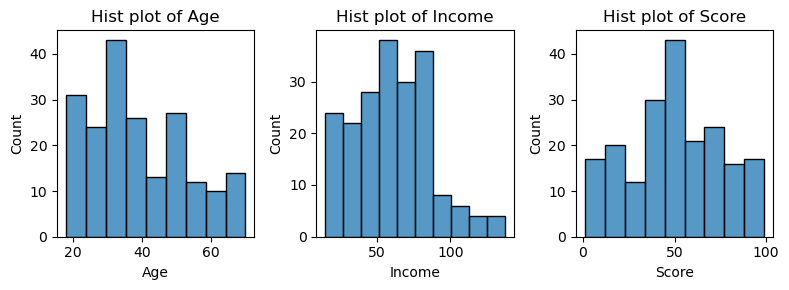

In [8]:
fig,axes= plt.subplots(1,3,figsize=(8,3))
for i,subject in enumerate (subjects):
    sns.histplot(
        data=df,
        x=subject,
        ax=axes[i]
    )
    axes[i].set_title(f'Hist plot of {subject}')
plt.tight_layout()
plt.show()

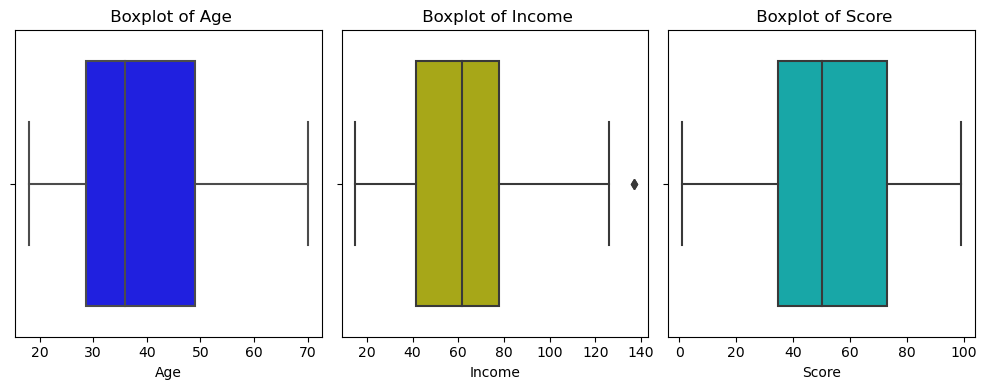

In [9]:
colors=['b','y','c']
fig, axes = plt.subplots(1,3, figsize=(10,4))
for i,(subject,color) in enumerate(zip(subjects,colors)):
    sns.boxplot(
        data=df,
        x=subject,
        ax=axes[i],
        color=color
    )
    axes[i].set_title(f' Boxplot of {subject}')
plt.tight_layout()
plt.show()

In [10]:
def outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    min_out=Q1-1.5*IQR
    max_out=Q3+1.5*IQR
    df.loc[df[column]>max_out, column]=max_out
    df.loc[df[column]<min_out, column]=min_out
    return df

In [11]:
for i in subjects :
    df=outliers(df,i)

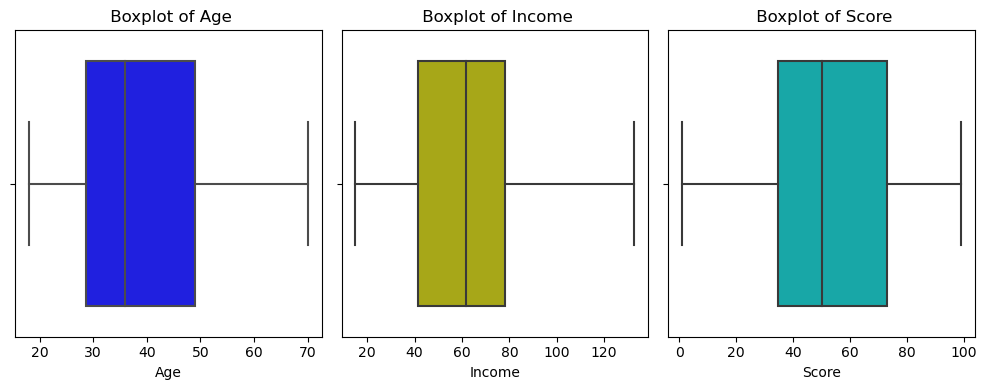

In [12]:
colors=['b','y','c']
fig, axes = plt.subplots(1,3, figsize=(10,4))
for i,(subject,color) in enumerate(zip(subjects,colors)):
    sns.boxplot(
        data=df,
        x=subject,
        ax=axes[i],
        color=color
    )
    axes[i].set_title(f' Boxplot of {subject}')
plt.tight_layout()
plt.show()

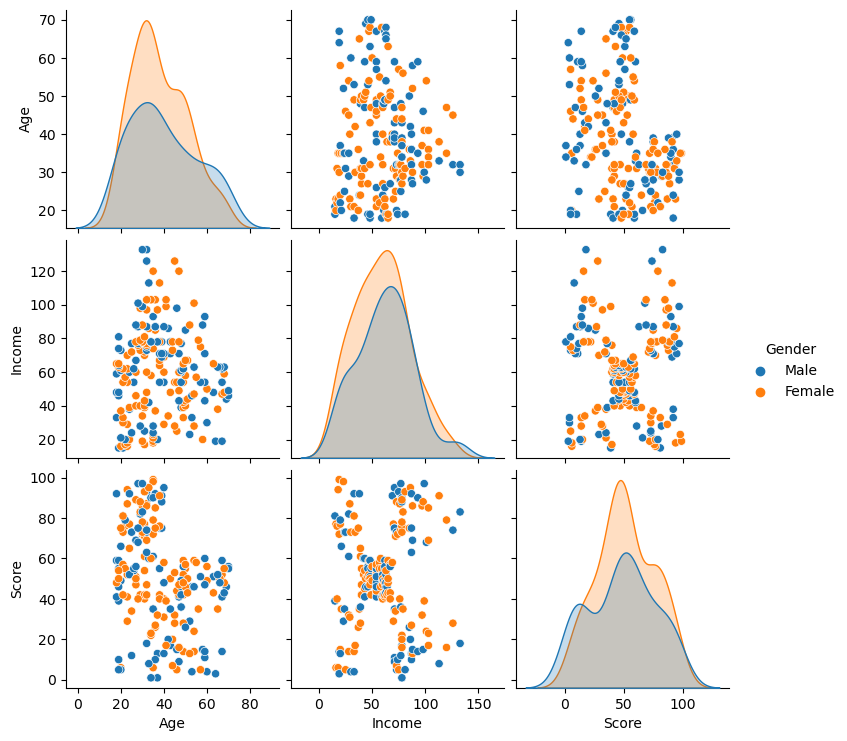

In [13]:
sns.pairplot(
        data=df,
        vars=subjects,
        hue = "Gender")
plt.show()

In [20]:
df.loc[df.Gender=='Male','Gender']=1
df.loc[df.Gender=='Female','Gender']=0

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds = df.copy()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [22]:
scaled_ds

,CustomerID,Gender,Age,Income,Score
0,-1.723412,1.128152,-1.424569,-1.745429,-0.434801
1,-1.706091,1.128152,-1.281035,-1.745429,1.195704
2,-1.688771,-0.886405,-1.352802,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.707083,1.040418
4,-1.654129,-0.886405,-0.563369,-1.668737,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.280936,1.118061
196,1.671450,-0.886405,0.441365,2.511014,-0.861839
197,1.688771,1.128152,-0.491602,2.511014,0.923953
198,1.706091,1.128152,-0.491602,2.769852,-1.250054


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

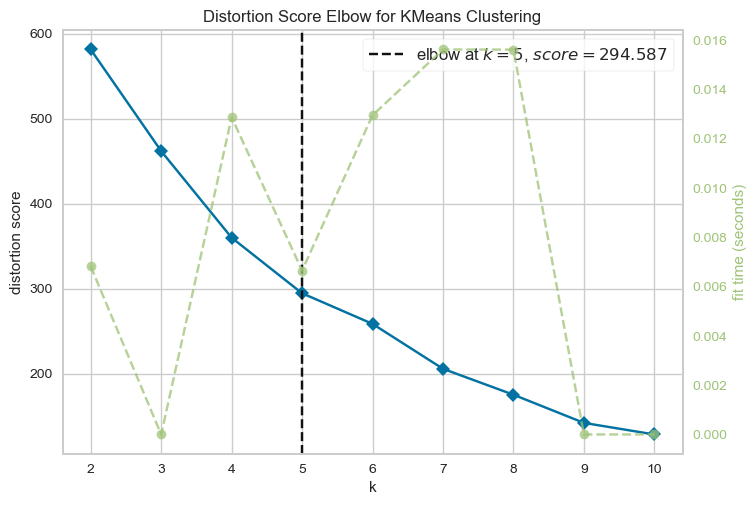

In [34]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()
plt.show()

In [70]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [71]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

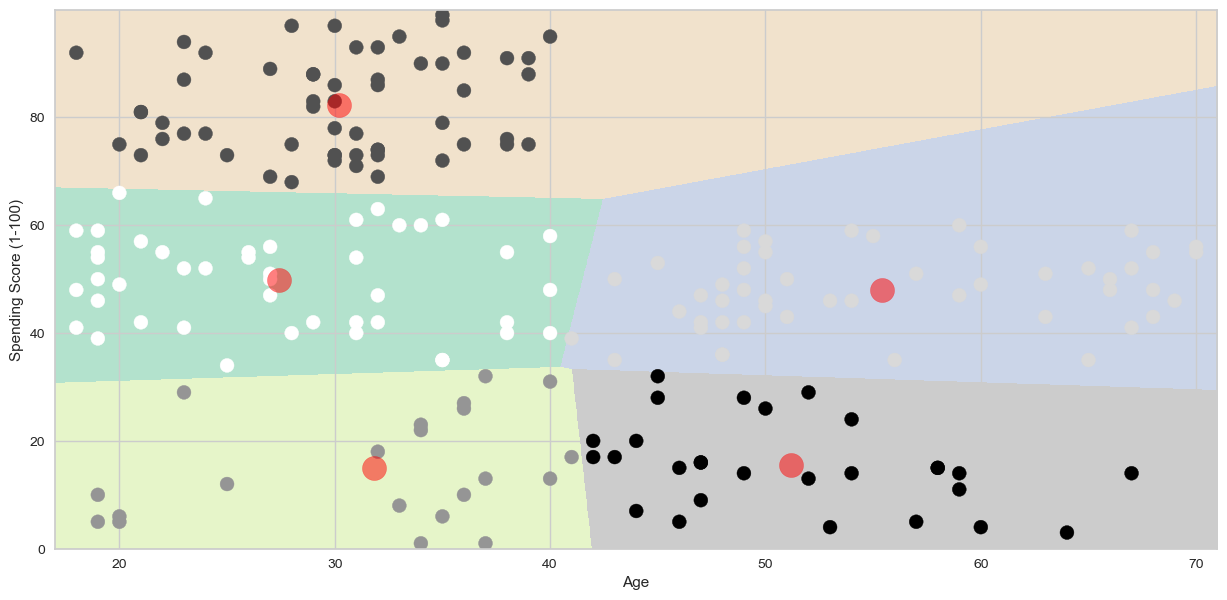

In [72]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Score', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [74]:
X2 = df[['Income' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

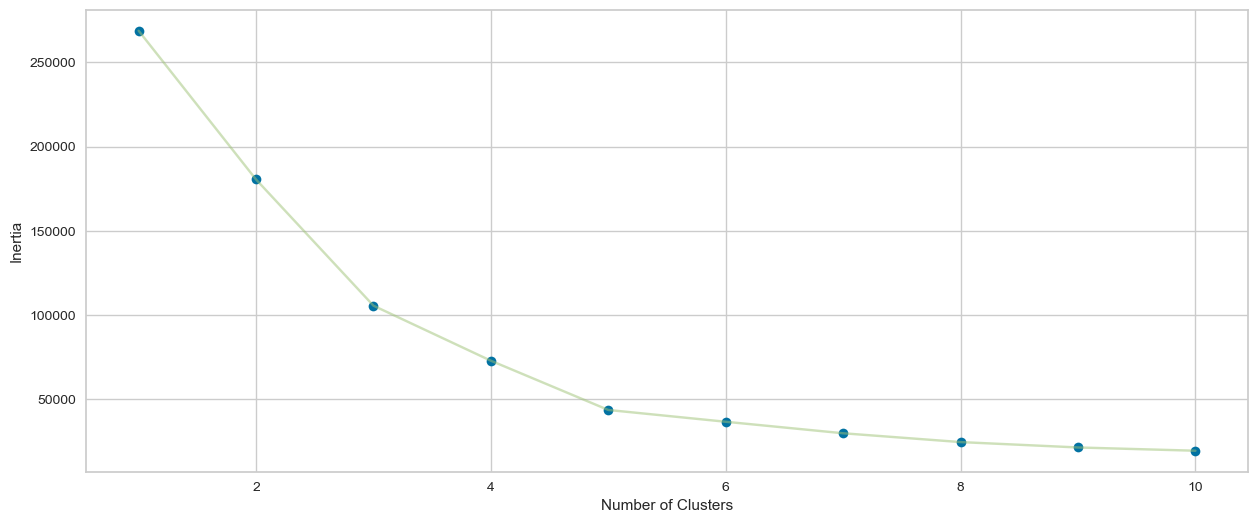

In [75]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [76]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [77]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

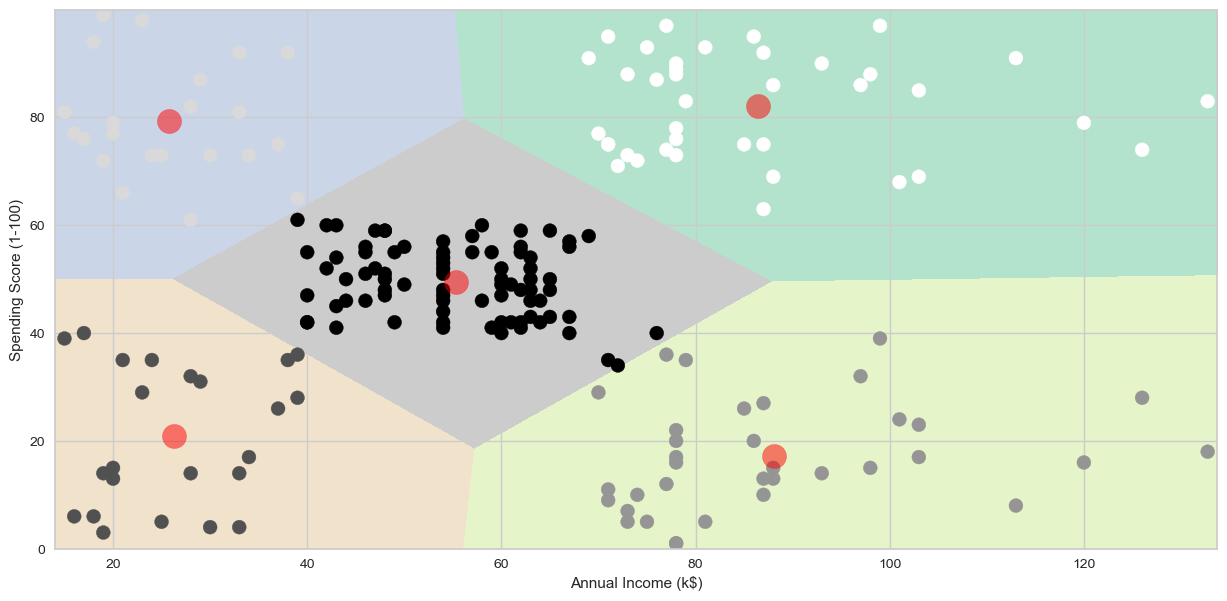

In [79]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'Score' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [81]:
X3 = df[['Age' , 'Income' ,'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

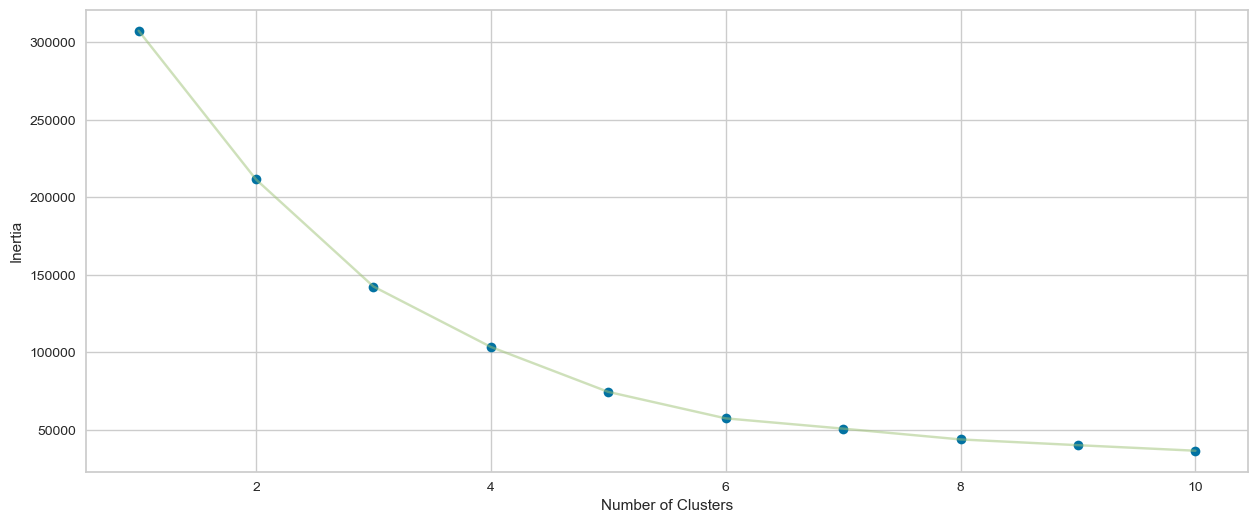

In [82]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [85]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Income,Score,Clusters,cluster
0,1,1,19.0,15.0,39.0,2,4
1,2,1,21.0,15.0,81.0,2,2
2,3,0,20.0,16.0,6.0,4,4
3,4,0,23.0,16.0,77.0,2,2
4,5,0,31.0,17.0,40.0,2,4


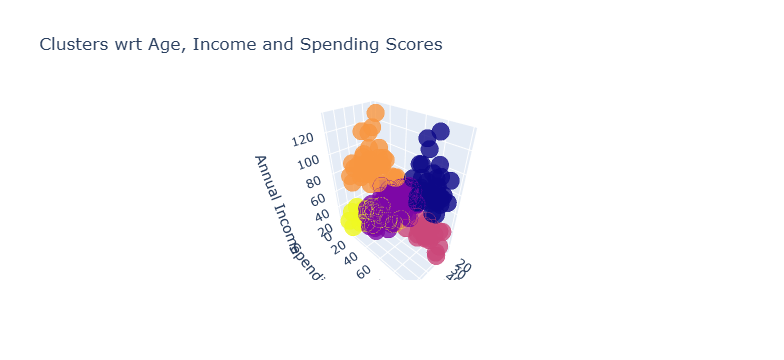

In [86]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
